In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.mnist.load_data()

In [3]:
y_train[0]

5

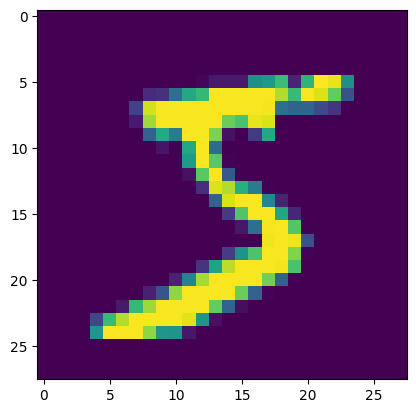

In [4]:
plt.imshow(X_train[0])

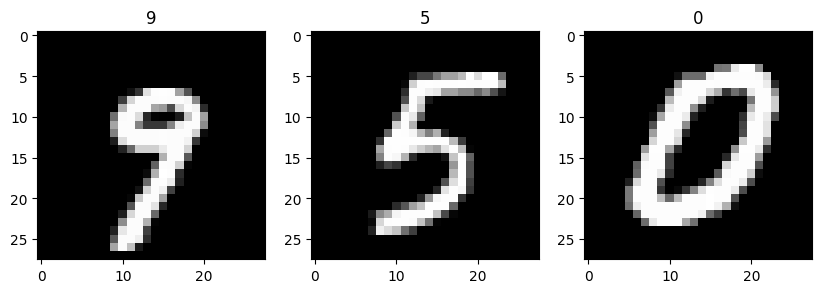

In [5]:
#visualizing the data

fig,axes = plt.subplots(1,3,figsize=(10,10))
axes  =axes.flatten()

for i in np.arange(0,1*3):
    index=np.random.randint(0,len(X_train))
    axes[i].imshow(X_train[index],  cmap='gray')
    axes[i].set_title(y_train[index])
    
    
plt.show()
    

In [6]:
len(X_train)

60000

In [7]:
X_train=X_train.reshape(-1,28*28)/255.0
X_test=X_test.reshape(-1,28*28)/255.0

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(130,activation="relu",input_shape=(784,)),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 130)               102050    
                                                                 
 dense_1 (Dense)             (None, 70)                9170      
                                                                 
 dense_2 (Dense)             (None, 10)                710       
                                                                 
Total params: 111930 (437.23 KB)
Trainable params: 111930 (437.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:

history =model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2281 - accuracy: 0.9328 - val_loss: 0.1185 - val_accuracy: 0.9645
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0987 - accuracy: 0.9706 - val_loss: 0.0841 - val_accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0683 - accuracy: 0.9782 - val_loss: 0.0894 - val_accuracy: 0.9701
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0536 - accuracy: 0.9827 - val_loss: 0.0773 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.0795 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0757 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.1106 - val_accu

In [10]:
loss,accuracy= model.evaluate(X_test,y_test)
print(loss,accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1199 - accuracy: 0.9721
0.11994750052690506 0.972100019454956


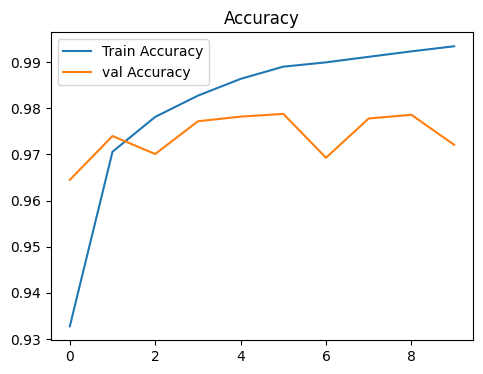

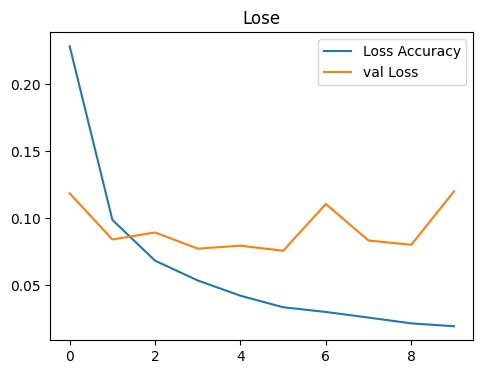

In [11]:
plt.figure(figsize=(12,4))


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Loss Accuracy')
plt.plot(history.history['val_loss'],label='val Loss')
plt.legend()
plt.title('Lose')


plt.show()